In [1]:
# dep: input: ../data/data_clean.csv

In [2]:
!python -V

Python 3.6.3 :: Anaconda custom (64-bit)


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

print('pandas version:', pd.__version__)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


pandas version: 0.22.0


In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

In [5]:
data_clean = pd.read_csv('../data/data_clean.csv')
data_clean.shape

(9334, 160)

In [6]:
# now to drop all NAs in died_hosp, score column
data = data_clean
data = data.dropna(subset=['died_hosp'])
data = data.dropna(subset=['anzrodriskofdeath'])
data = data.dropna(subset=['apache3score'])
data.shape

(9266, 160)

# Review Scoring Rows

In [7]:
def plot_class_broke_down_hist(df, var, xlog=False, ylog=False, **histkwargs):
    df[var][df.died_hosp == 0].hist(alpha=.5, label='survived', color = "green", **histkwargs)
    df[var][df.died_hosp == 1].hist(alpha=.5, label='died', color = "red", **histkwargs)
    plt.xlabel(var)
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')
    plt.legend();

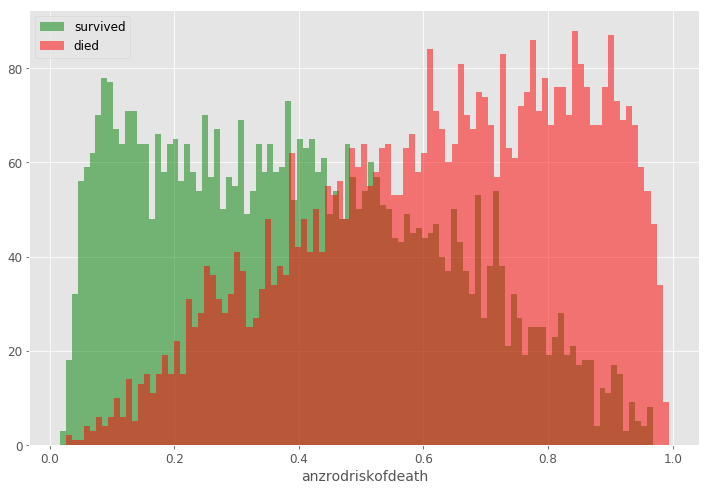

In [8]:
plot_class_broke_down_hist(data, 'anzrodriskofdeath', bins=100)

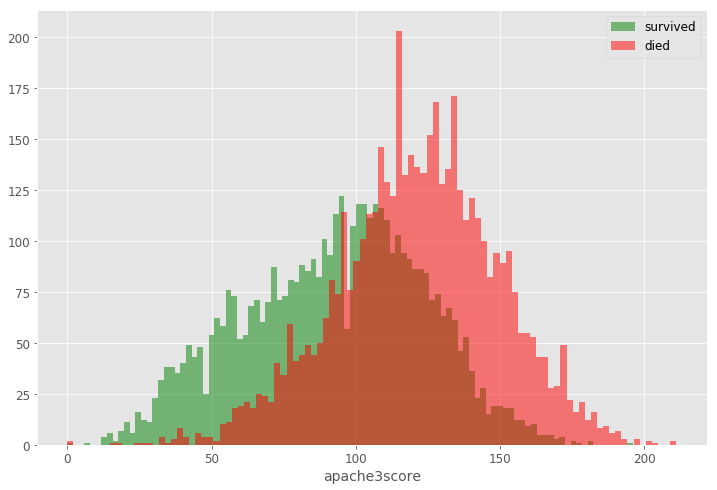

In [9]:
plot_class_broke_down_hist(data, 'apache3score', bins=100)

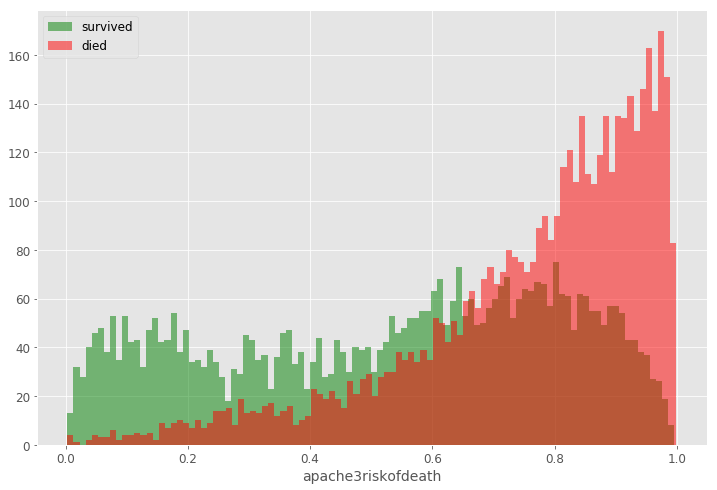

In [10]:
plot_class_broke_down_hist(data, 'apache3riskofdeath', bins=100)

In [11]:
import numpy as np
from sklearn import metrics
# y = np.array([1, 1, 2, 2])
# pred = np.array([0.1, 0.4, 0.35, 0.8])

actual = data.died_hosp
predict = data.apache3score

model = dict()
actual = dict()
predict = dict()
color = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 2

model[0] = 'apache3'
actual[0] = data.died_hosp
predict[0] = data.apache3score
color[0] = 'blue'

model[1] = 'ANZROD'
actual[1] = data.died_hosp
predict[1] = data.anzrodriskofdeath
color[1] = 'orange'



for i in range(n_classes):
    fpr[i], tpr[i], thresholds = metrics.roc_curve(actual[i], predict[i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

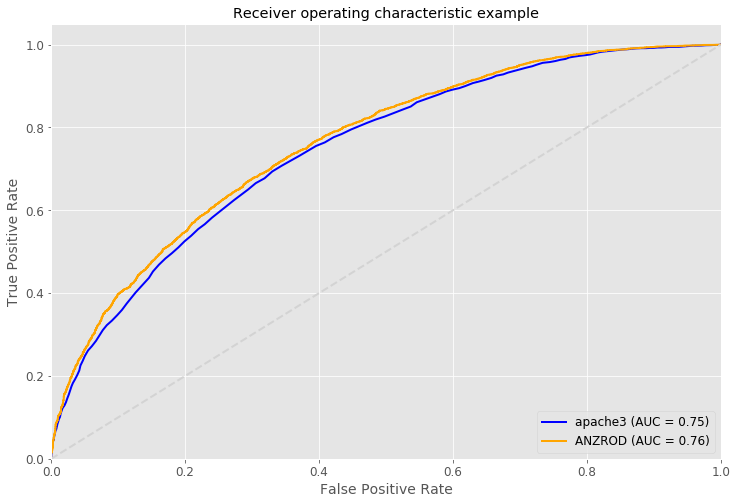

In [12]:
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=color[i],
         lw=lw, label=model[i]+' (AUC = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='lightgrey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
